In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AmesHousing.csv')

In [12]:
df= df.drop(['Order', 'PID'], axis=1)


In [16]:
df_new = df.copy()
df_new.drop('SalePrice', axis=1, inplace=True)

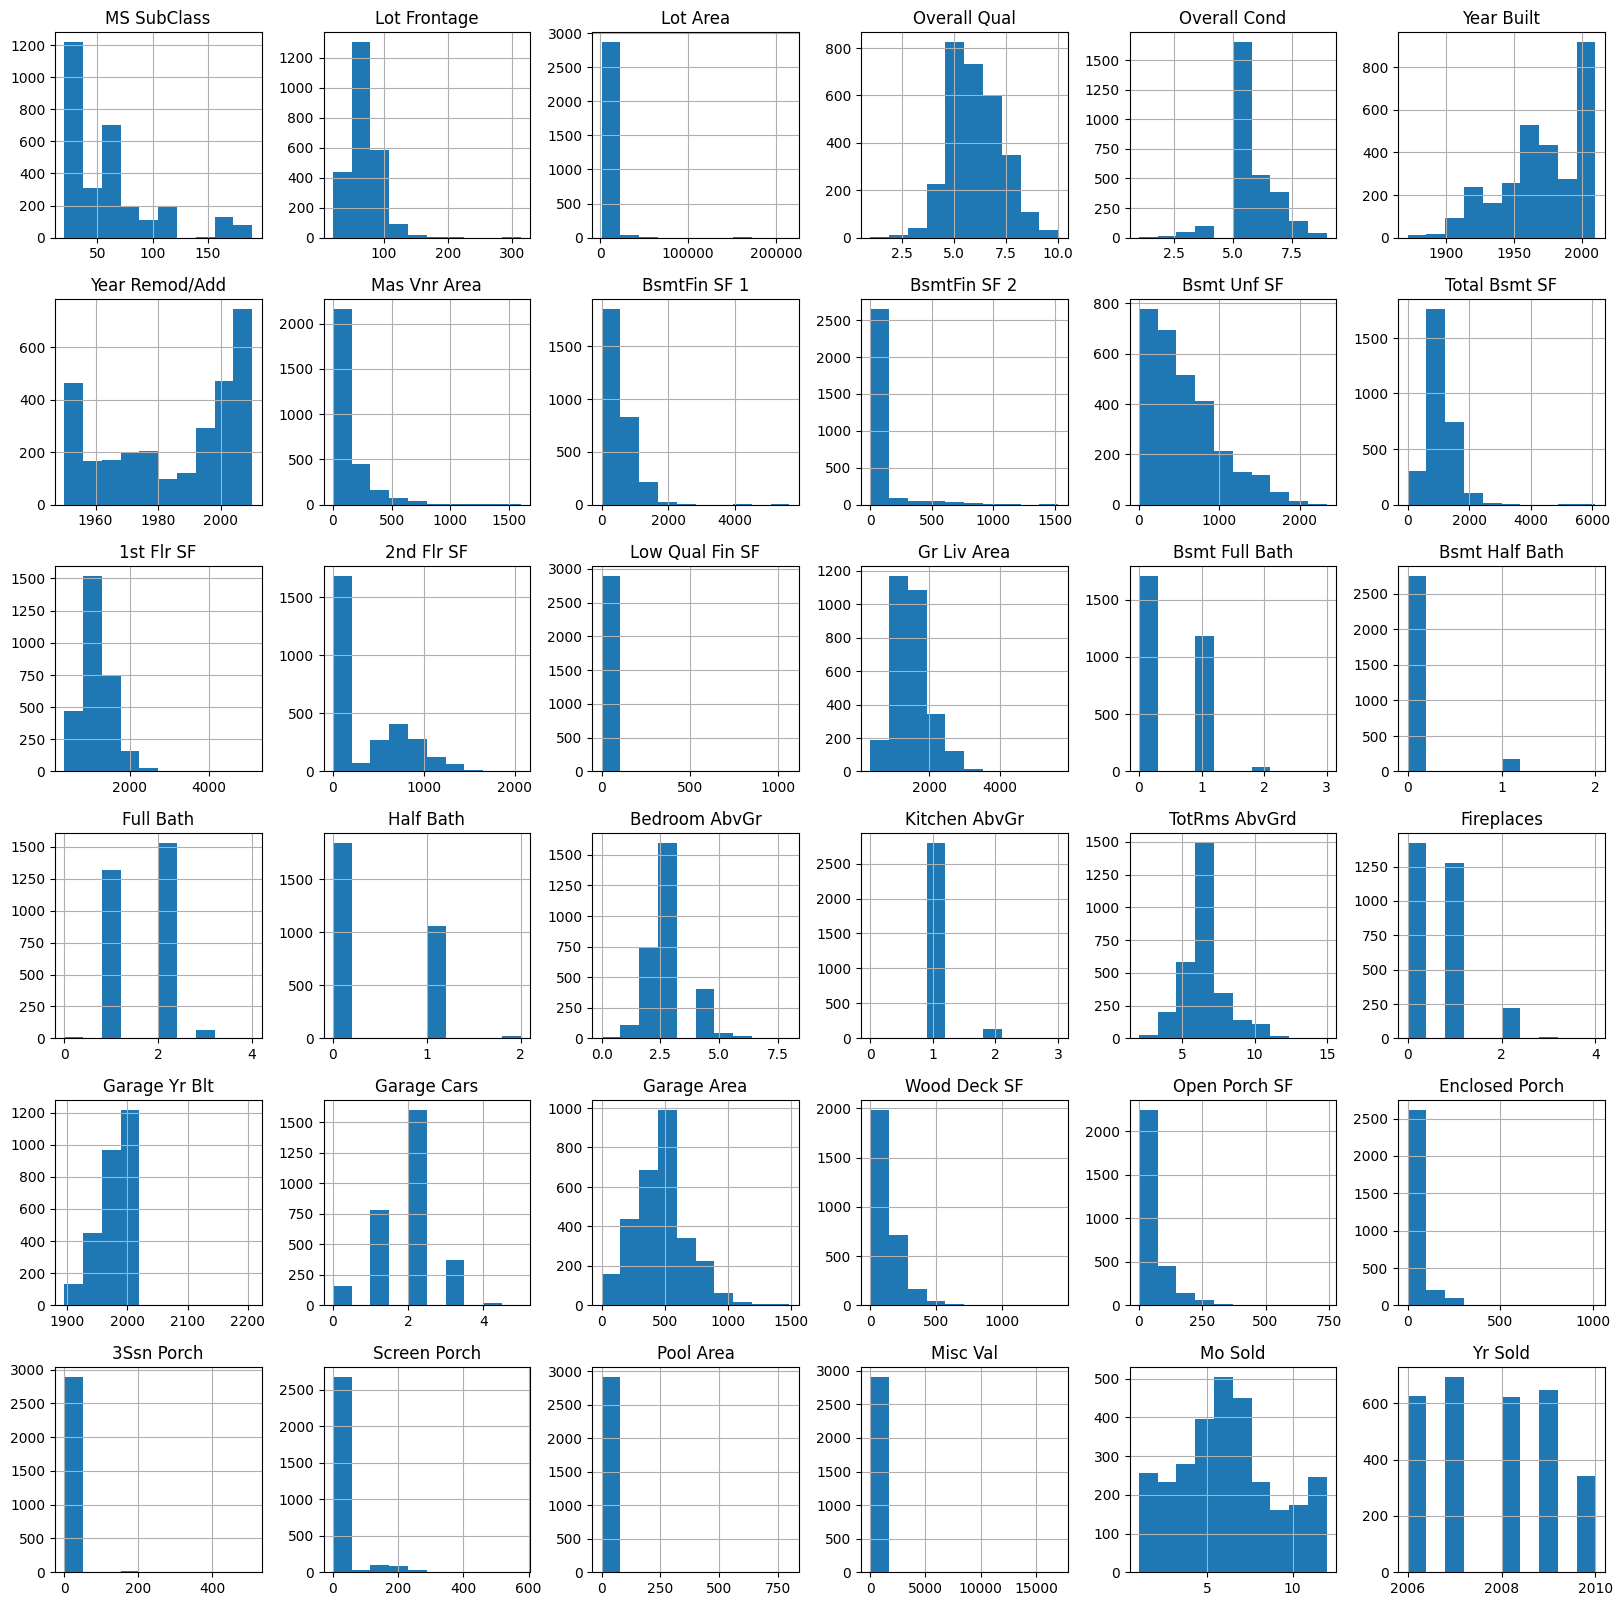

In [19]:
df_new.hist(figsize=(20, 20))

plt.show()

<Axes: xlabel='SalePrice'>

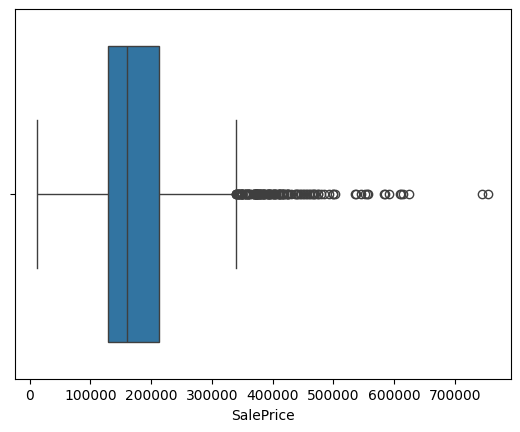

In [33]:

sns.boxplot(data = df, x = 'SalePrice')


In [34]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


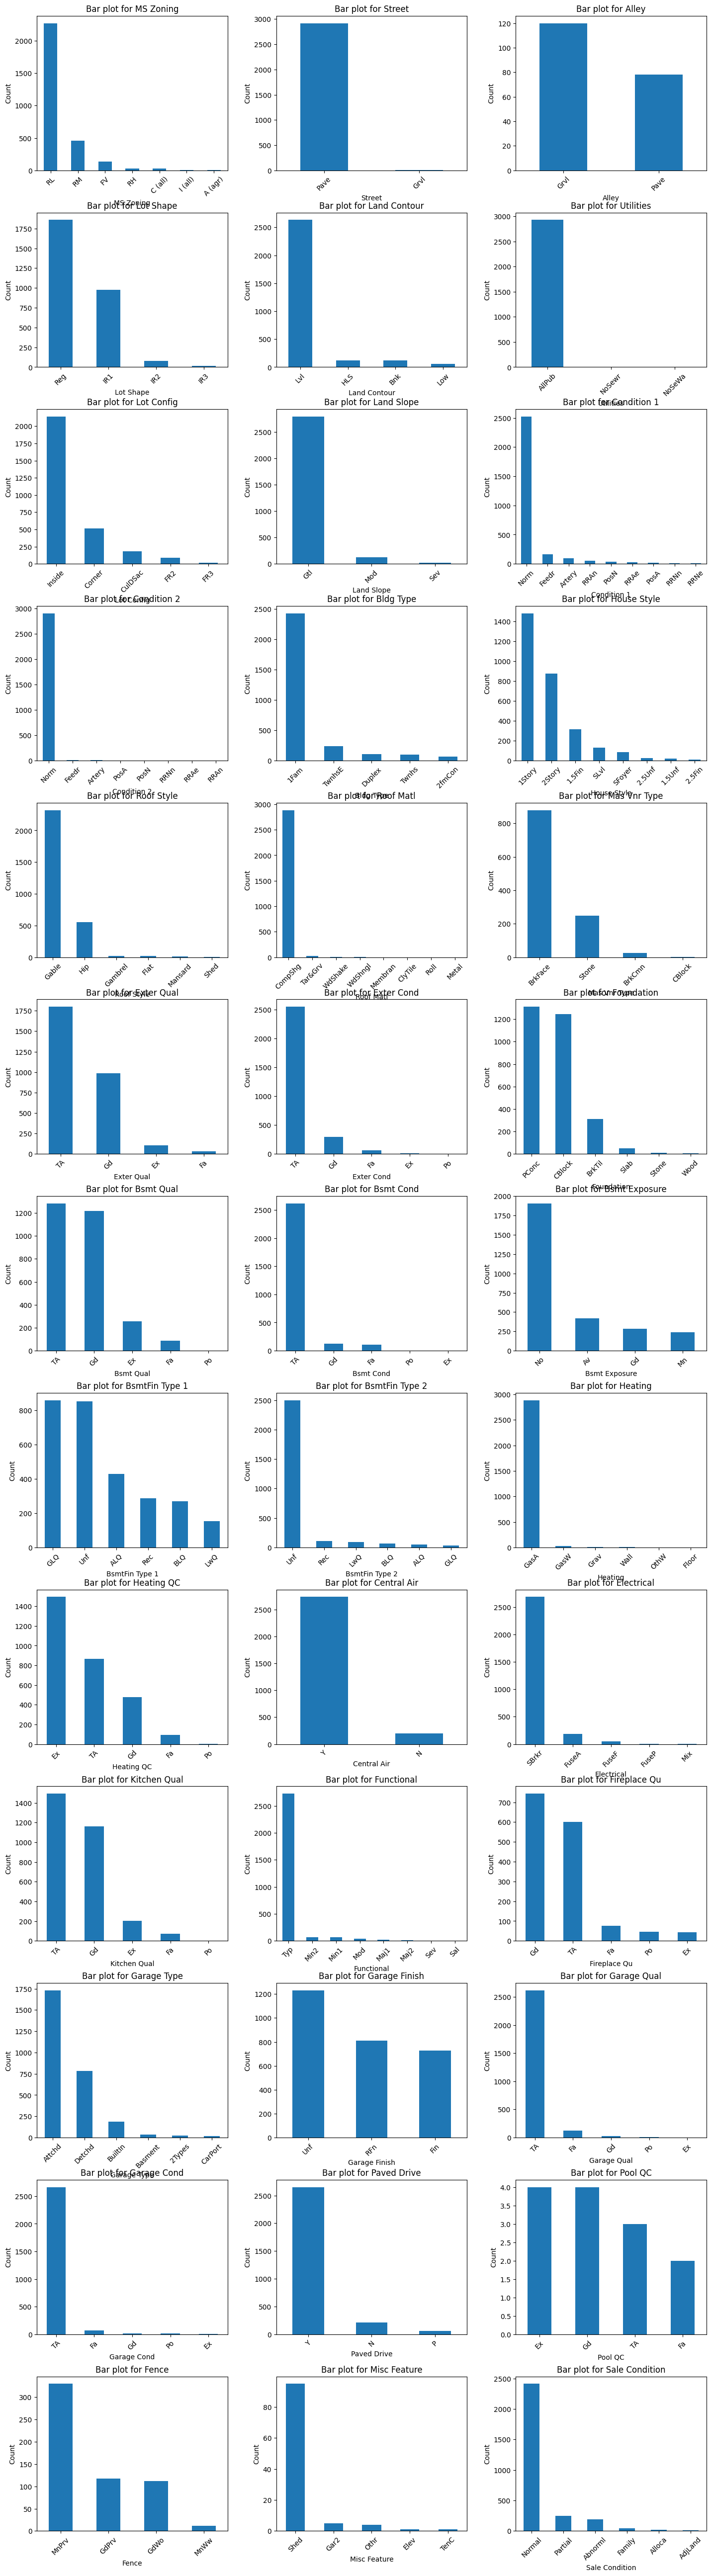

In [40]:
categorical_columns = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype == 'object']

n = len(categorical_columns)  
ncols = 3  
nrows = n // ncols + (n % ncols > 0)  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))  
fig.tight_layout(pad=4.0)  

for i, col in enumerate(categorical_columns):
    ax = axes[i//ncols, i%ncols]  
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar plot for {col}')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.show()

<Axes: >

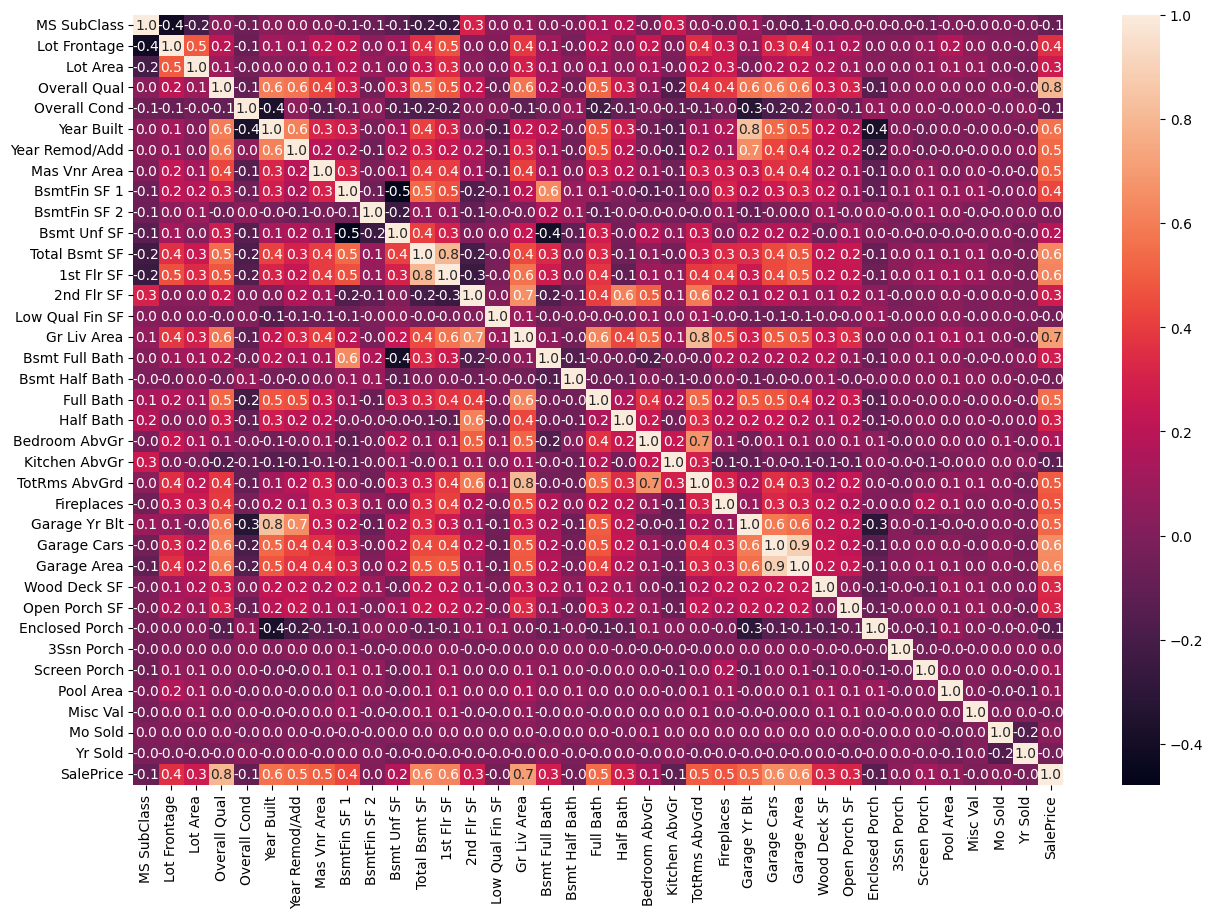

In [45]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

C:\Users\User\AppData\Local\Temp\ipykernel_20524\2320909632.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation Coefficient', y='Variables', data=strong_corr_df, palette='viridis')


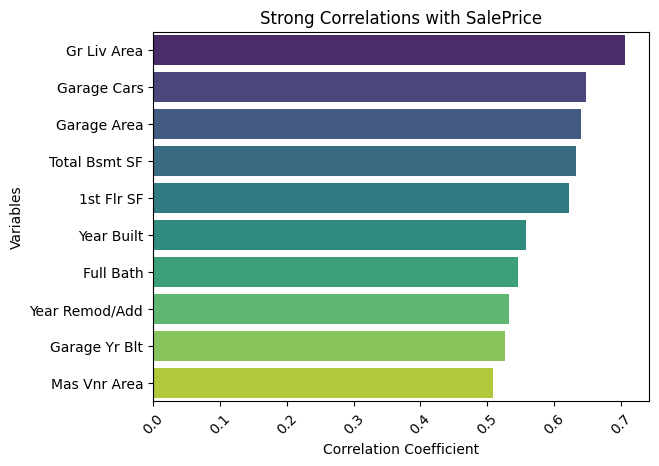

In [61]:
salePrice_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

strong_corr = salePrice_corr[salePrice_corr > 0.5]

strong_corr.drop('SalePrice', inplace=True)

strong_corr.drop('Overall Qual', inplace=True)

strong_corr_df = strong_corr.reset_index()
strong_corr_df.columns = ['Variables', 'Correlation Coefficient']

sns.barplot(x='Correlation Coefficient', y='Variables', data=strong_corr_df, palette='viridis')

plt.title('Strong Correlations with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.xticks(rotation=45)
plt.show()
